#Báo cáo bài tập lớn
#Đề tài 7


<br>Nguyễn Quốc Khánh
<br>Nguyễn Công Đạt
<br>Đinh Thành Công

###Khai báo các thư viện cần dùng

In [ ]:
# # for loading/processing the images
# from tensorflow.keras.utils import load_img
# from tensorflow.keras.utils import img_to_array

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

###Đọc dữ liệu

In [ ]:
import cv2
import os
import numpy as np
# Define a function to load images from a folder and resize them
def load_images_from_folder(folder, target_size=(28, 28)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

In [ ]:
# Training datasets
cat_images = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/cats')
dog_images = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/dogs')
frog_images = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/frogs')
monkey_images = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/monkeys')

#Validation datasets
cat_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/cats')
dog_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/dogs')
frog_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/frogs')
monkey_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/monkeys')


In [ ]:
print("Number of training cat images:", len(cat_images))
print("Number of training dog images:", len(dog_images))
print("Number of training frog images:", len(frog_images))
print("Number of training monkey images:", len(monkey_images))
print("------------------------------------------")

print("Number of valid cat images:", len(cat_val))
print("Number of valid dog images:", len(dog_val))
print("Number of valid frog images:", len(frog_val))
print("Number of valid monkey images:", len(monkey_val))
print("------------------------------------------")

print("Size of training cat images:", cat_images[0].shape)
print("Size of training dog images:", dog_images[0].shape)
print("Size of training frog images:", frog_images[0].shape)
print("Size of training monkey images:", monkey_images[0].shape)
print("------------------------------------------")

print("Size of valid cat images:", cat_images[0].shape)
print("Size of valid dog images:", dog_images[0].shape)
print("Size of valid frog images:", frog_images[0].shape)
print("Size of valid monkey images:", monkey_images[0].shape)

Number of training cat images: 1000
Number of training dog images: 1000
Number of training frog images: 896
Number of training monkey images: 1000
------------------------------------------
Number of valid cat images: 500
Number of valid dog images: 500
Number of valid frog images: 500
Number of valid monkey images: 500
------------------------------------------
Size of training cat images: (28, 28, 3)
Size of training dog images: (28, 28, 3)
Size of training frog images: (28, 28, 3)
Size of training monkey images: (28, 28, 3)
------------------------------------------
Size of valid cat images: (28, 28, 3)
Size of valid dog images: (28, 28, 3)
Size of valid frog images: (28, 28, 3)
Size of valid monkey images: (28, 28, 3)


##Yêu cầu 1: Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc 2D.

In [ ]:
# Concatenate the images into a single numpy array
images = np.concatenate([cat_images, dog_images, frog_images, monkey_images])

In [ ]:
images = images.reshape(images.shape[0],-1)

In [ ]:
images.shape

(3896, 2352)

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the number of dimensions
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images)
images_pca.shape

(3896, 2)

Số chiều dữ liệu giảm từ 150528 chiều về 2 chiều

In [ ]:
# Apply PCA to reduce the number of dimensions to 3
pca = PCA(n_components=3)
images_pca_3d = pca.fit_transform(images)
images_pca_3d.shape

(3896, 3)

Số chiều là 3 chiều

Để trực quan hóa dữ liệu, ta sử dụng thư viện seaborn:

In [ ]:
# Assign labels to the images
n_cat = len(cat_images)
n_dog = len(dog_images)
n_frog = len(frog_images)
n_monkey = len(monkey_images)

y = np.concatenate([
    np.zeros(n_cat, dtype=int),
    np.ones(n_dog, dtype=int),
    np.full(n_frog, 2, dtype=int),
    np.full(n_monkey, 3, dtype=int)
])


In [ ]:
label = []
for index in range(y.shape[0]):
    if y[index] == 0:
        label.append('Cat')
    elif y[index] == 1:
        label.append("Dog")
    elif y[index] == 2:
        label.append("Frog")
    else:
        label.append("Monkey")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


<Axes: >

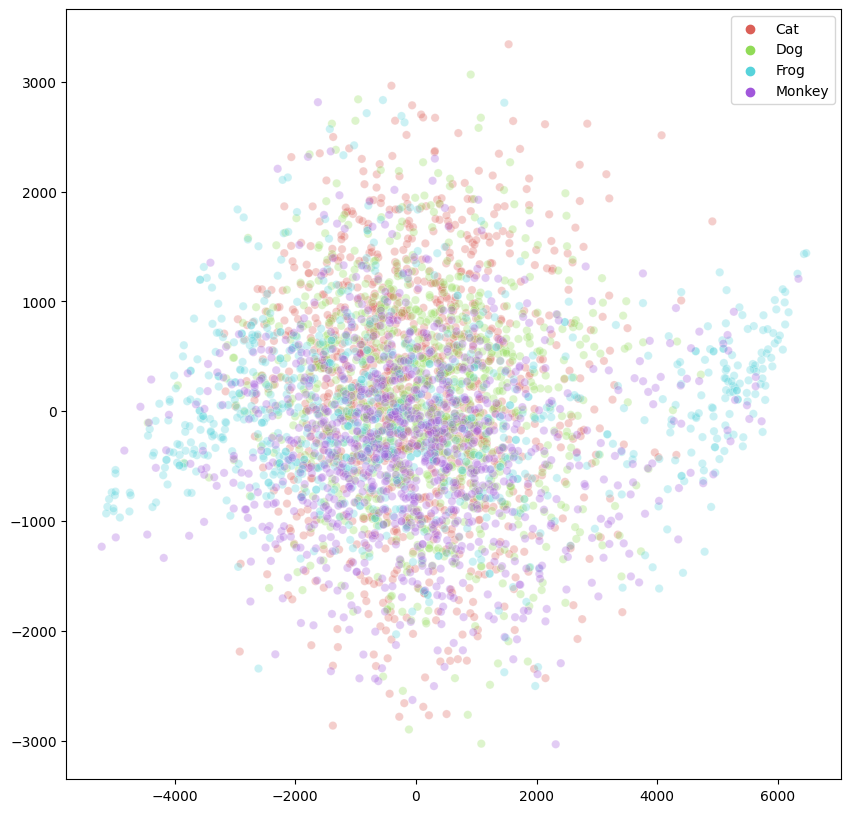

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))

sns.scatterplot(
    x= images_pca[:,0], y=images_pca[:,1],
    hue = label,
    hue_order = ['Cat','Dog','Frog','Monkey'],
    palette=sns.color_palette("hls", 4),
    data=images_pca,
    legend="full",
    alpha=0.3
)

3D

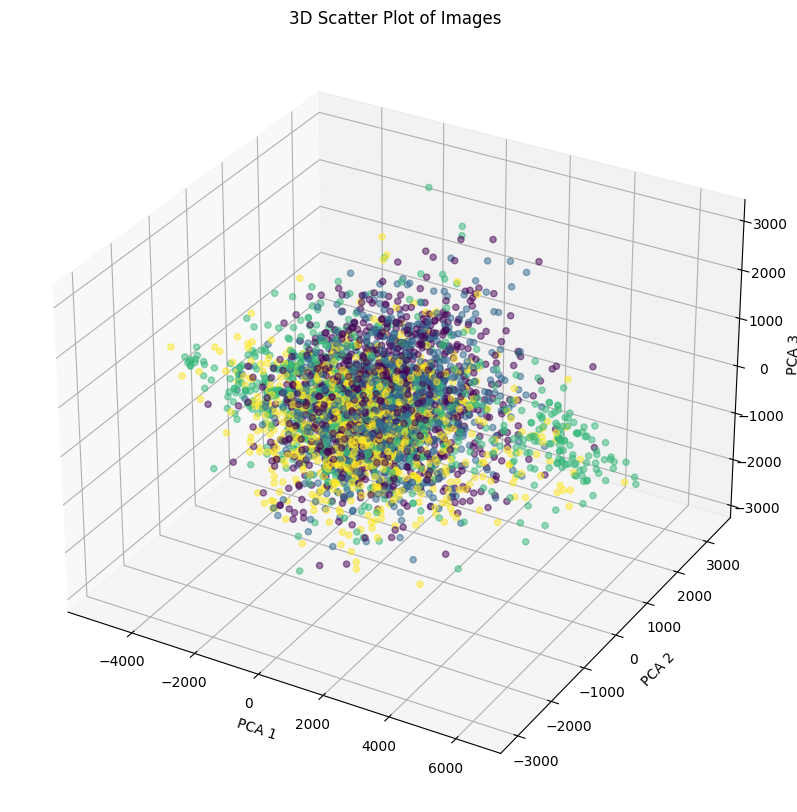

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(images_pca_3d[:, 0], images_pca_3d[:, 1], images_pca_3d[:, 2], c=y,  alpha=0.5)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of Images')

plt.show()

##Yêu cầu 2: Thực hiện phân cụm (clustering) dữ liệu gốc bằng 01 thuật toán phân cụm. Hiển thị trực quan và đánh dấu các cụm.

In [ ]:
#import thư viện
from sklearn.cluster import KMeans
#chọn số cụm k
kmeans = KMeans(n_clusters= 4)

Dự báo nhãn của các cụm

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(images_pca)

print(label)

[2 3 0 ... 2 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dùng phương thức cluster_centers_ để tìm ra các tọa độ tâm cụm

In [ ]:
#toạ độ các tâm cụm
centroids = kmeans.cluster_centers_
print(centroids)

[[  595.19442069  -719.73555612]
 [   34.68160095   853.00081171]
 [-2006.84227848   -91.50458669]
 [ 3786.94377874   102.66177211]]


Dùng phương thức unique để xem các giá trị dự đoán có được từ label là duy nhất

In [ ]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3], dtype=int32)

Trực quan hóa

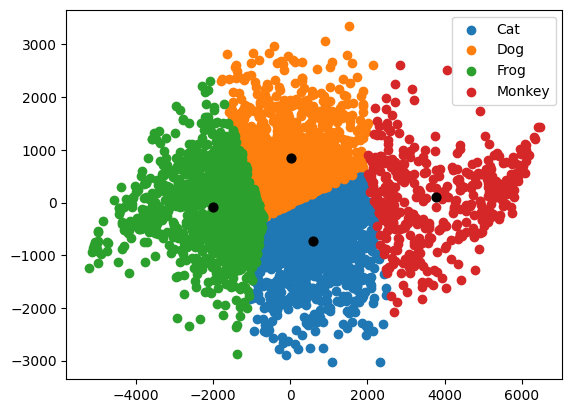

In [ ]:
for i in u_labels:
    plt.scatter(images_pca[label == i , 0] , images_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'k')
plt.legend(['Cat','Dog','Frog','Monkey'])
plt.show()

##Yêu cầu 3: Xây dựng chương trình sử dụng mô hình Naïve Bayes phù hợp để phân loại các hình ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.

In [ ]:
# Concatenate the train images into a single numpy array
X_train = np.concatenate([cat_images, dog_images, frog_images, monkey_images])
# Reshape the train images to be 2D
X_train = X_train.reshape(X_train.shape[0], -1)

# Concatenate the validation images into a single numpy array
X_val = np.concatenate([cat_val, dog_val, frog_val, monkey_val])
# Reshape the validation images to be 2D
X_val = X_val.reshape(X_val.shape[0], -1)

Sau khi bạn sử dụng reshape, dữ liệu vẫn được giữ nguyên và không bị mất đặc trưng. Phương thức reshape chỉ thực hiện việc thay đổi hình dạng của dữ liệu từ mảng 4D (số lượng ảnh, chiều cao, chiều rộng, số kênh màu) thành mảng 2D (số lượng ảnh, tổng số pixel trong mỗi ảnh).

Việc reshape dữ liệu thành 2D có thể hữu ích khi sử dụng một số mô hình học máy như Gaussian Naive Bayes, yêu cầu dữ liệu có số chiều là 2. Trong trường hợp này, việc reshape không làm mất thông tin hay đặc trưng của dữ liệu.

In [ ]:
# Create the corresponding labels for the training data
y_train = np.concatenate([
    np.full(len(cat_images), 0),
    np.full(len(dog_images), 1),
    np.full(len(frog_images), 2),
    np.full(len(monkey_images), 3)
])

# Create the corresponding labels for the validation data
y_val = np.concatenate([
    np.full(len(cat_val), 0),
    np.full(len(dog_val), 1),
    np.full(len(frog_val), 2),
    np.full(len(monkey_val), 3)
])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score

### GAUSSIAN NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_val)
rs =recall_score(y_val,y_pred, average="weighted")
ps = precision_score(y_val,y_pred, average="weighted")
print("Accuracy of model gaussian naive bayes is:", accuracy_score(y_val, y_pred))
print("Confusion matrix of model gaussian naive bayes is: ")
print(confusion_matrix(y_val,y_pred))
print("recall score of model gaussian naive bayes is:",rs)
print("Precision score of model gaussian naive bayes is:", ps)

Accuracy of model gaussian naive bayes is: 0.445
Confusion matrix of model gaussian naive bayes is: 
[[177 132  66 125]
 [105 200  61 134]
 [ 18  68 257 157]
 [ 37 135  72 256]]
recall score of model gaussian naive bayes is: 0.445
Precision score of model gaussian naive bayes is: 0.4609007999525423


In [ ]:
# Choose the index of the sample you want to predict
sample_index = int(input("Nhap index cua anh muon du doan: "))

# Reshape the sample into a 2D array
sample = X_val[sample_index].reshape(1, -1)

# Predict the label for the sample
predicted_label = gnb.predict(sample)

# Get the true label from y_val
true_label = y_val[sample_index]

# Print the predicted and true labels
print("Predicted label:", predicted_label)
print("True label:", int(true_label))

Nhap index cua anh muon du doan: 1000
Predicted label: [2]
True label: 2


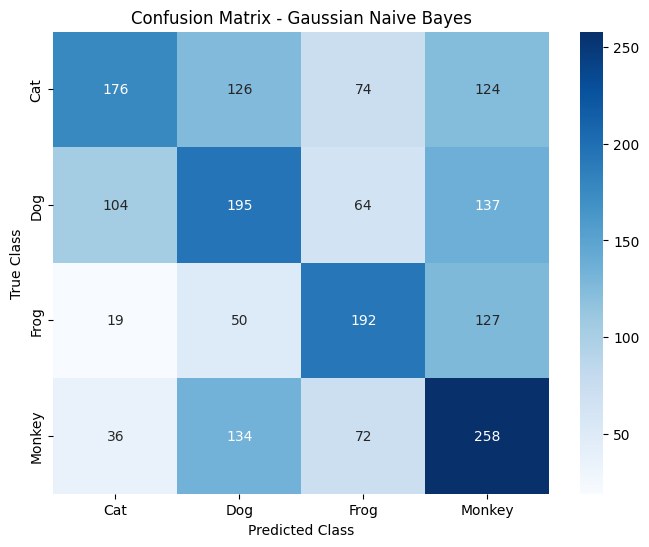

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix Gaussian Naive Bayes
cm_gaussian = np.array([[176, 126, 74, 124],
                        [104, 195, 64, 137],
                        [19, 50, 192, 127],
                        [36, 134, 72, 258]])

labels = ['Cat', 'Dog', 'Frog', 'Monkey']

# Plot confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


#Multi-class Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
import numpy as np

# Hàm tải dữ liệu từ thư mục
def load_images_from_folder(folder, target_size=(28, 28)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

# # Tải dữ liệu từ các thư mục và resize ảnh
cat_train = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/cats')
dog_train = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/dogs')
cow_train = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/frogs')
monkey_train = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/train/monkeys')
cat_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/cats')
dog_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/dogs')
cow_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/frogs')
monkey_val = load_images_from_folder('/content/drive/MyDrive/final-project-machine-learning/data/data/validation/monkeys')

# Gộp dữ liệu train và validation vào một mảng
X_train = np.concatenate((cat_train, dog_train, cow_train, monkey_train))
X_val = np.concatenate((cat_val, dog_val, cow_val, monkey_val))

# Tạo nhãn cho các lớp
y_train = np.concatenate((np.zeros(len(cat_train)), np.ones(len(dog_train)), np.full(len(cow_train), 2), np.full(len(monkey_train), 3)))
y_val = np.concatenate((np.zeros(len(cat_val)), np.ones(len(dog_val)), np.full(len(cow_val), 2), np.full(len(monkey_val), 3)))

# Reshape và chuẩn hóa dữ liệu hình ảnh
X_train = X_train.reshape(len(X_train), -1)
X_val = X_val.reshape(len(X_val), -1)
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# Tạo mô hình Multi-Classes SVM với phương pháp One-vs-One
model = OneVsOneClassifier(svm.SVC(kernel='linear'))

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu validation
y_pred = model.predict(X_val)

# Tính toán độ chính xác



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Tính precision
precision = precision_score(y_val, y_pred, average='weighted')

# Tính recall
recall = recall_score(y_val, y_pred, average='weighted')

# Tính confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
print("Độ chính xác multi-class svm:", accuracy)

print("Confusion Matrix:")
print(confusion_mat)
print("Precision:", precision)
print("Recall:", recall)

Độ chính xác multi-class svm: 0.463
Confusion Matrix:
[[232 101  71  96]
 [146 127  74 153]
 [ 68  47 312  73]
 [ 84  85  76 255]]
Precision: 0.4544551387540788
Recall: 0.463


In [ ]:
# Choose the index of the sample you want to predict
sample_index = int(input("Nhap index cua anh muon du doan: "))

# Reshape the sample into a 2D array
sample = X_val[sample_index].reshape(1, -1)

# Predict the label for the sample
predicted_label = model.predict(sample)

# Get the true label from y_val
true_label = y_val[sample_index]

# Print the predicted and true labels
print("Predicted label:", predicted_label)
print("True label:", int(true_label))

Nhap index cua anh muon du doan: 999
Predicted label: [3.]
True label: 1


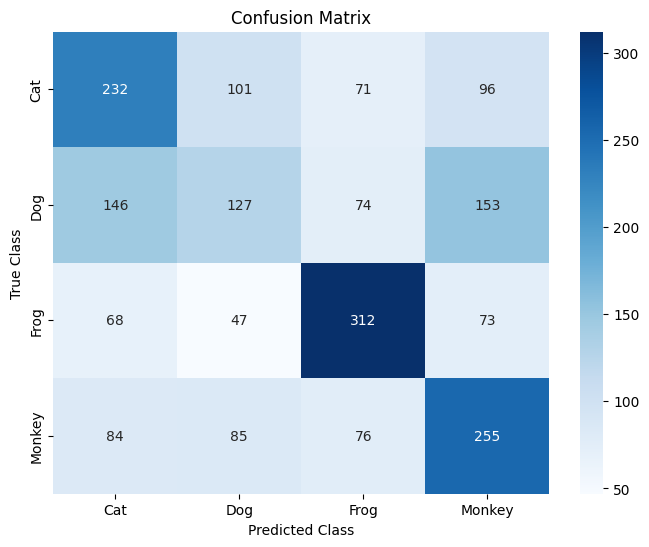

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)

# Labels
labels = ['Cat', 'Dog', 'Frog', 'Monkey']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
